In [1]:
import pandas as pd

# Load the dataset
file_path = './close.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand its structure
data.head()

,close
0,4261.48
1,4261.45
2,4310.07
3,4308.83
4,4304.31


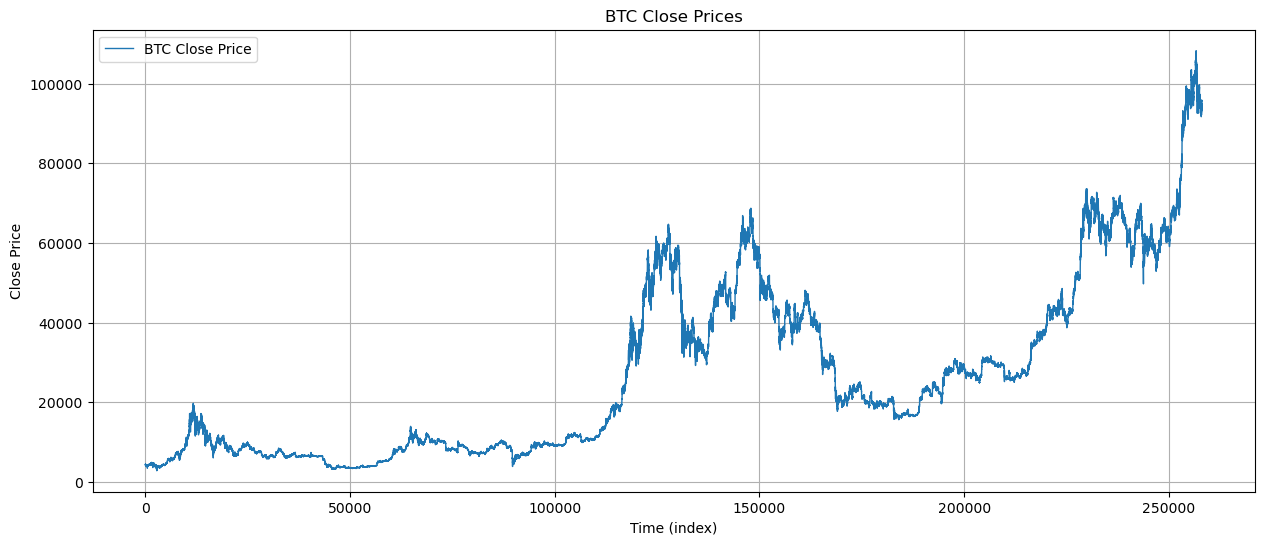

In [2]:
import matplotlib.pyplot as plt

# Plot the closing prices to visualize the data
plt.figure(figsize=(15, 6))
plt.plot(data['close'], label='BTC Close Price', linewidth=1)
plt.title('BTC Close Prices')
plt.xlabel('Time (index)')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()


In [3]:
# from scipy.signal import savgol_filter

# # Apply Savitzky-Golay filter to smooth the data
# window_length = 21  # Length of the smoothing window (must be odd)
# polyorder = 3       # Order of the polynomial fit

# # Ensure the window length is appropriate for the data size
# if len(data['close']) < window_length:
#     window_length = len(data['close']) - 1 if len(data['close']) % 2 == 0 else len(data['close'])

# data['smoothed'] = savgol_filter(data['close'], window_length=window_length, polyorder=polyorder)

# # Plot the original and smoothed data
# plt.figure(figsize=(15, 6))
# plt.plot(data['close'], label='Original Data', linewidth=1, alpha=0.7)
# plt.plot(data['smoothed'], label='Smoothed Data (Savitzky-Golay)', linewidth=2)
# plt.title('Smoothed Data using Savitzky-Golay Filter')
# plt.xlabel('Time (index)')
# plt.ylabel('Close Price')
# plt.legend()
# plt.grid()
# plt.show()

In [4]:
# import numpy as np
# raw_pct_change = np.diff(data['close']) / data['close'][:-1]
# smoothed_pct_change = np.diff(data['smoothed']) / data['smoothed'][:-1]

# correlation = np.corrcoef(raw_pct_change, smoothed_pct_change)[0, 1]
# print(f"Percentage Change Correlation: {correlation}")

In [5]:
# # Detect peaks on raw and smoothed data
# raw_peaks = argrelextrema(data['close'].values, np.greater, order=5)[0]
# smoothed_peaks = argrelextrema(data['smoothed'].values, np.greater, order=5)[0]

# ppr = len(smoothed_peaks) / len(raw_peaks) if len(raw_peaks) > 0 else 0
# print(f"Peak Preservation Ratio: {ppr}")

In [6]:
from PyEMD import EMD
import numpy as np

# Extract the smoothed data for EMD (or raw data if preferred)
signal = data['smoothed'].values if 'smoothed' in data.columns else data['close'].values

# Perform EMD
emd = EMD()
imfs = emd(signal)

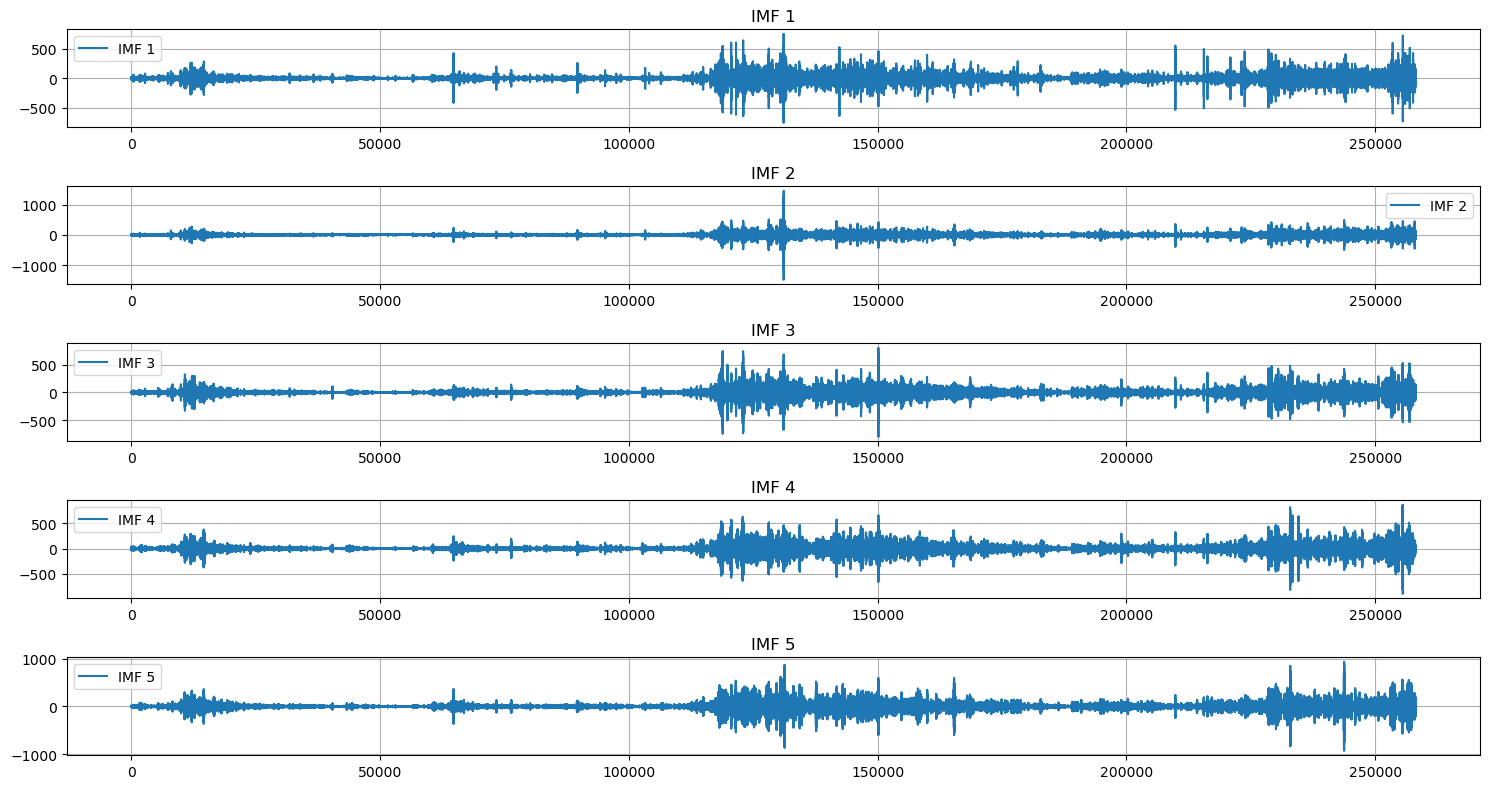

In [7]:
# Plot the first few IMFs
plt.figure(figsize=(15, 8))
for i, imf in enumerate(imfs[:5]):  # Plot the first 5 IMFs
    plt.subplot(5, 1, i + 1)
    plt.plot(imf, label=f'IMF {i + 1}')
    plt.title(f'IMF {i + 1}')
    plt.grid()
    plt.legend()
plt.tight_layout()
plt.show()

In [8]:
total_energy = sum(signal ** 2)
imf_energies = [sum(imf ** 2) / total_energy for imf in imfs]

# Print energy contributions
for i, energy in enumerate(imf_energies):
    print(f"IMF {i + 1}: {energy * 100:.2f}% of total energy")

IMF 1: 0.00% of total energy
IMF 2: 0.00% of total energy
IMF 3: 0.00% of total energy
IMF 4: 0.00% of total energy
IMF 5: 0.00% of total energy
IMF 6: 0.00% of total energy
IMF 7: 0.00% of total energy
IMF 8: 0.00% of total energy
IMF 9: 0.00% of total energy
IMF 10: 0.01% of total energy
IMF 11: 0.01% of total energy
IMF 12: 0.03% of total energy
IMF 13: 0.07% of total energy
IMF 14: 0.12% of total energy
IMF 15: 0.28% of total energy
IMF 16: 1.90% of total energy
IMF 17: 2.17% of total energy
IMF 18: 14.76% of total energy
IMF 19: 89.28% of total energy


In [9]:
correlations = [np.corrcoef(imf, signal)[0, 1] for imf in imfs]
for i, corr in enumerate(correlations):
    print(f"IMF {i + 1}: Correlation = {corr:.2f}")

IMF 1: Correlation = 0.00
IMF 2: Correlation = 0.00
IMF 3: Correlation = 0.00
IMF 4: Correlation = 0.00
IMF 5: Correlation = 0.00
IMF 6: Correlation = 0.00
IMF 7: Correlation = 0.01
IMF 8: Correlation = 0.01
IMF 9: Correlation = 0.02
IMF 10: Correlation = 0.00
IMF 11: Correlation = 0.02
IMF 12: Correlation = 0.07
IMF 13: Correlation = 0.04
IMF 14: Correlation = 0.04
IMF 15: Correlation = 0.02
IMF 16: Correlation = 0.16
IMF 17: Correlation = 0.20
IMF 18: Correlation = 0.60
IMF 19: Correlation = 0.74


In [10]:
# Add the first few IMFs (e.g., IMF 1 and IMF 2) to the dataset
selected_imfs = [imfs[0], imfs[1], imfs[2], imfs[3], imfs[4], imfs[5]]  # Adjust based on your analysis
for i, imf in enumerate(selected_imfs):
    data[f'IMF_{i+1}'] = imf

print("File saved as 'augmented_with_imfs.csv'")

File saved as 'augmented_with_imfs.csv'


In [11]:
reconstructed_signal = np.sum(selected_imfs, axis=0)

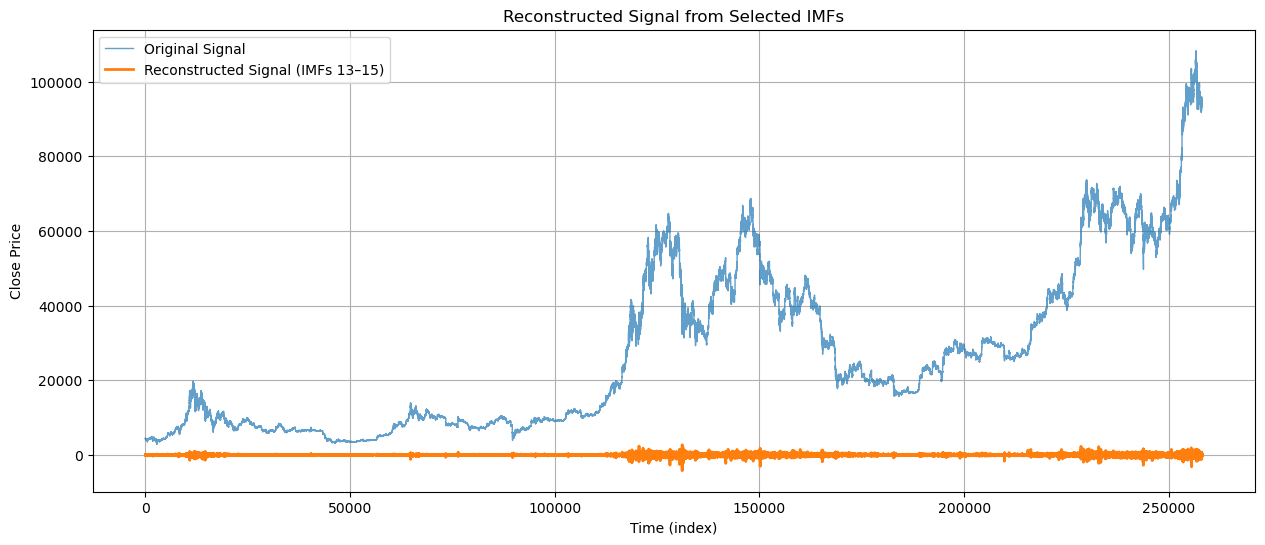

In [12]:
# Step 3: Visualize the reconstructed signal
plt.figure(figsize=(15, 6))
plt.plot(data['close'], label='Original Signal', linewidth=1, alpha=0.7)
plt.plot(reconstructed_signal, label='Reconstructed Signal (IMFs 13–15)', linewidth=2)
plt.title('Reconstructed Signal from Selected IMFs')
plt.xlabel('Time (index)')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

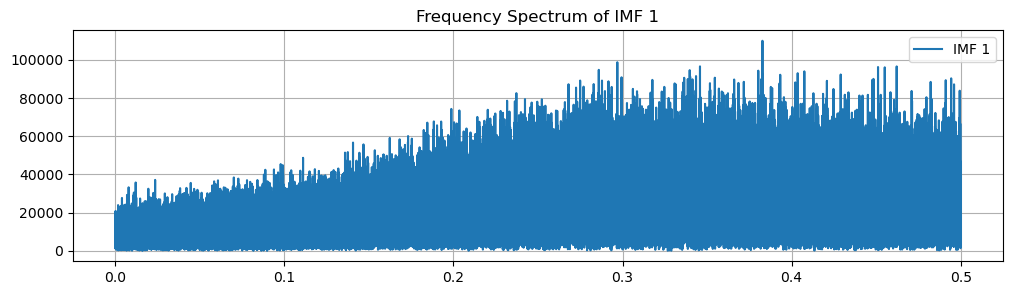

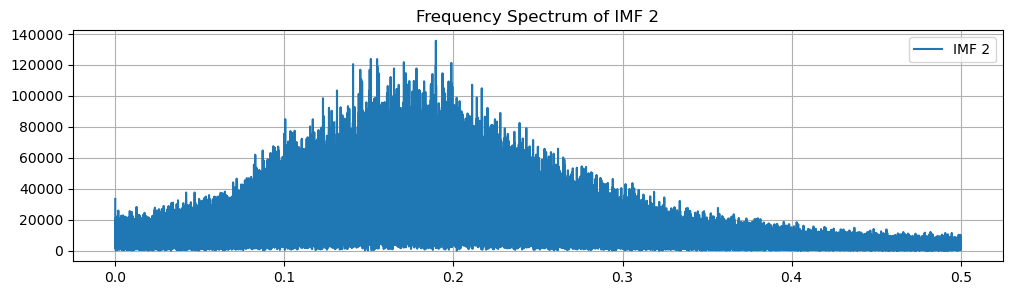

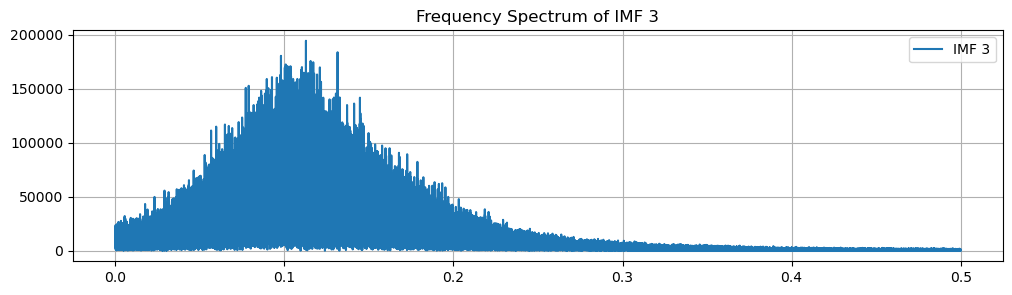

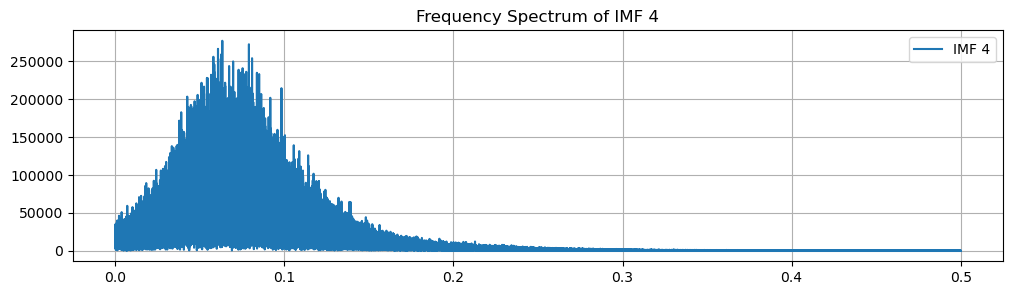

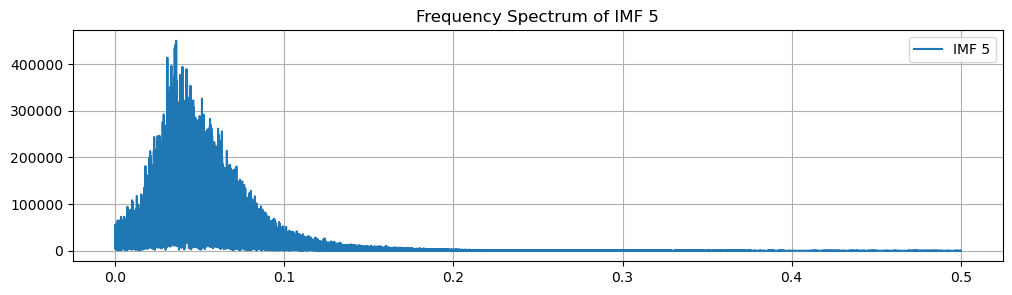

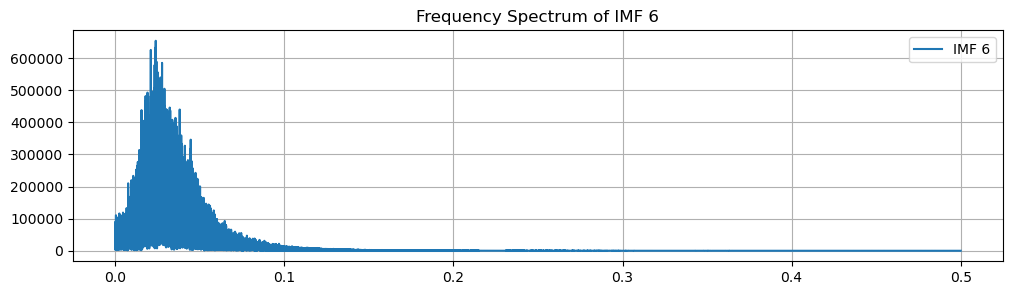

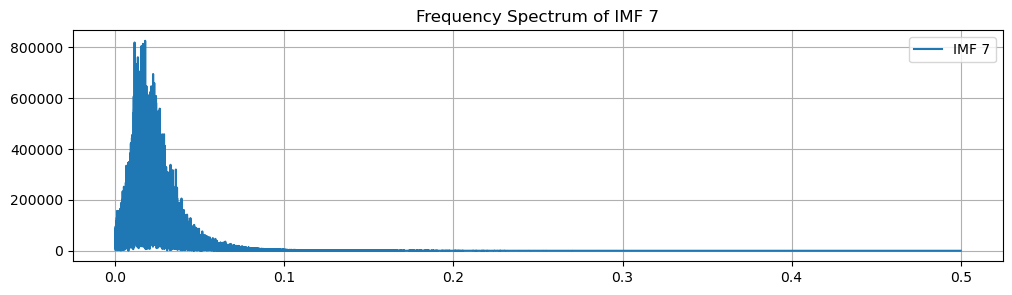

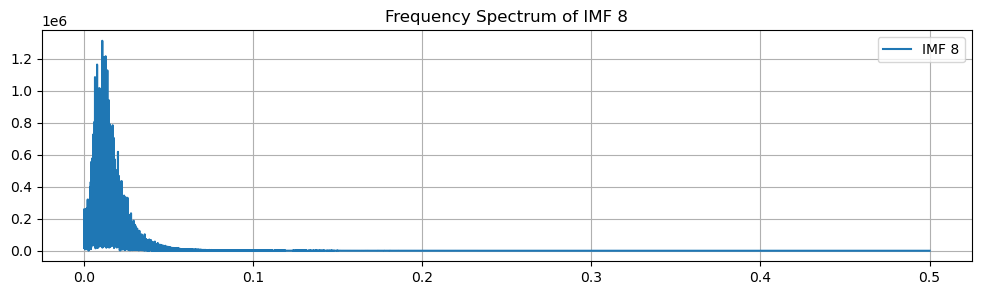

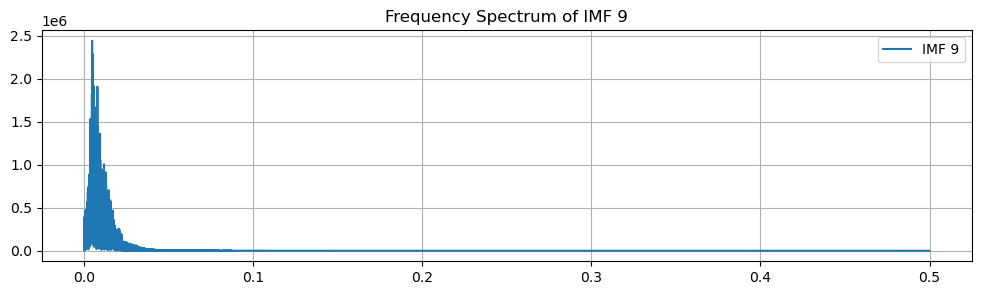

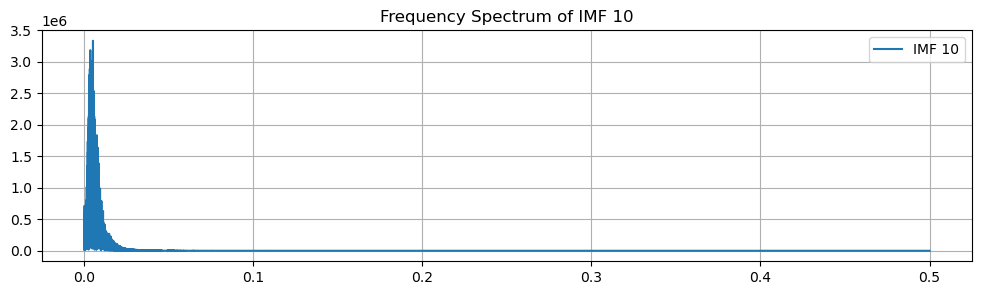

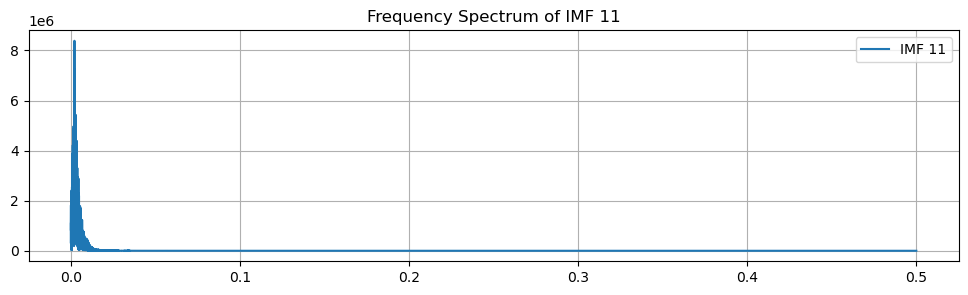

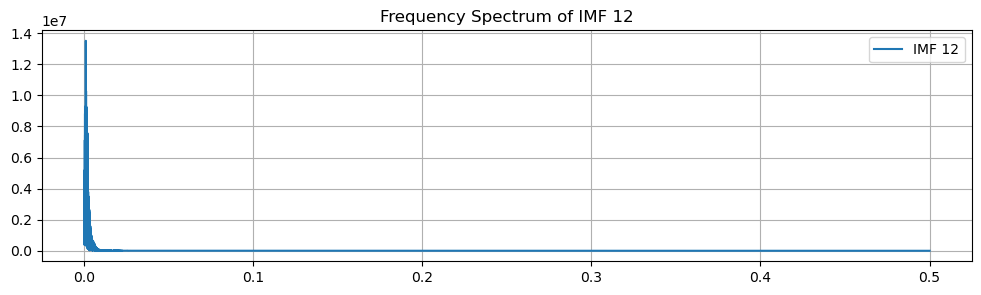

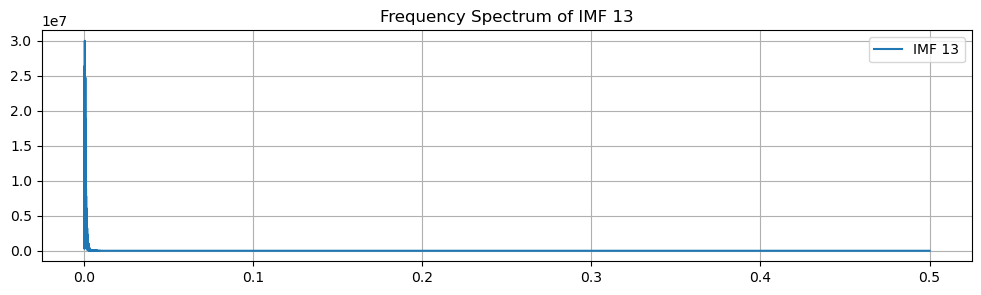

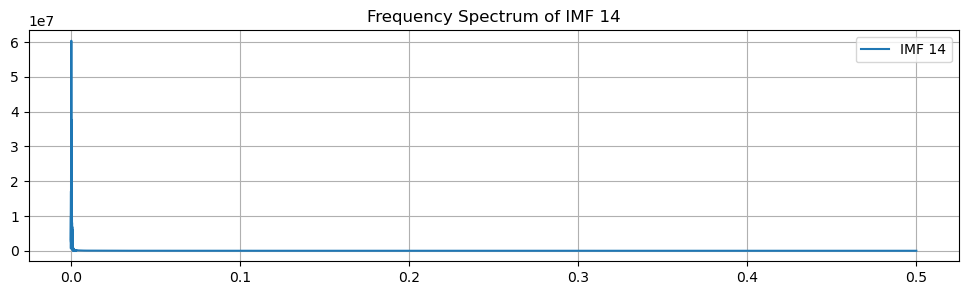

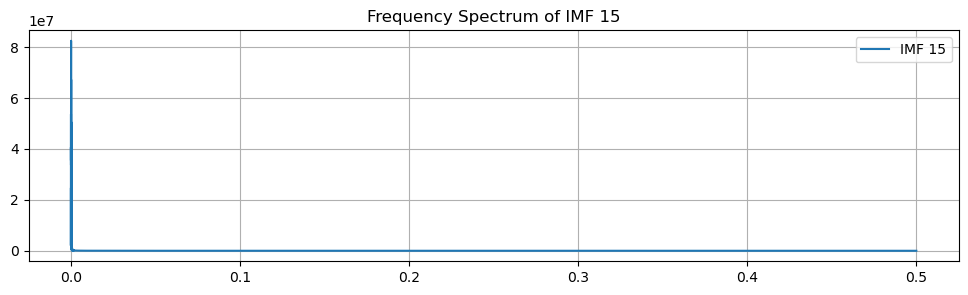

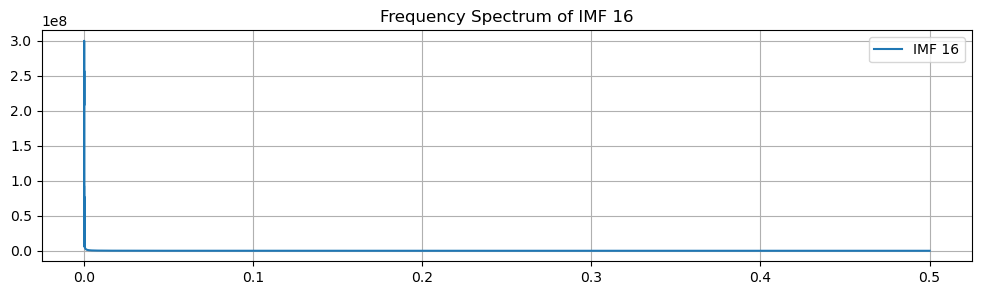

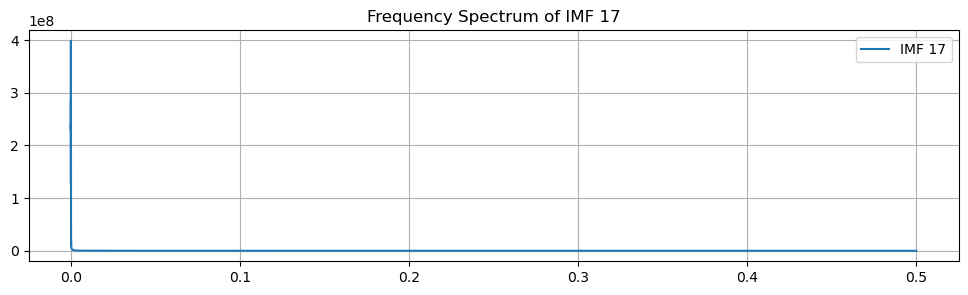

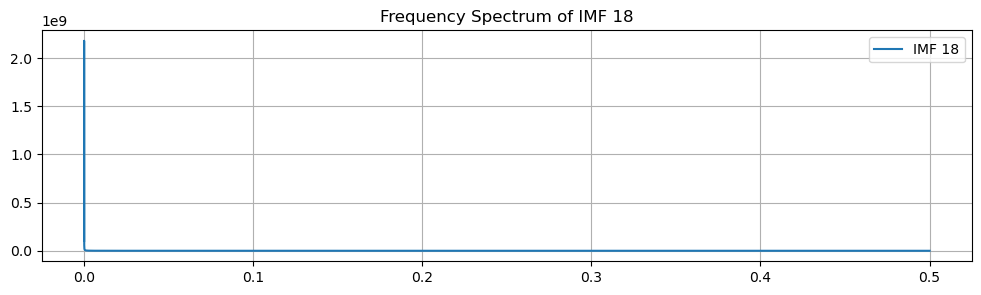

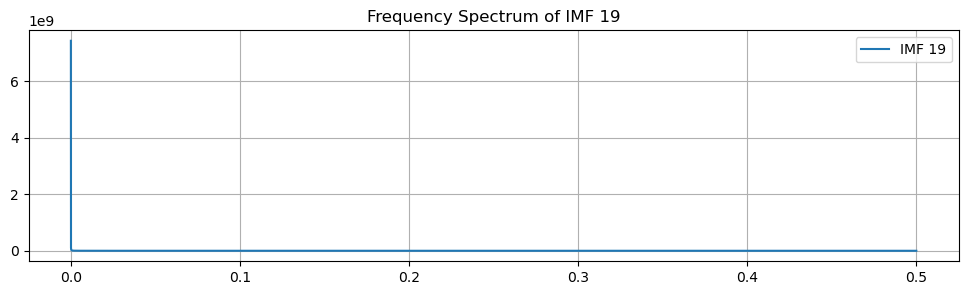

In [13]:
from scipy.fft import fft, fftfreq

for i, imf in enumerate(imfs):
    fft_values = np.abs(fft(imf))
    freqs = fftfreq(len(imf))
    plt.figure(figsize=(12, 3))
    plt.plot(freqs[:len(freqs)//2], fft_values[:len(freqs)//2], label=f'IMF {i + 1}')
    plt.title(f'Frequency Spectrum of IMF {i + 1}')
    plt.grid()
    plt.legend()
    plt.show()

In [14]:
from scipy.signal import argrelextrema
order = 1
local_maxima = argrelextrema(reconstructed_signal, comparator=np.greater, order=order)[0]
local_minima = argrelextrema(reconstructed_signal, comparator=np.less, order=order)[0]


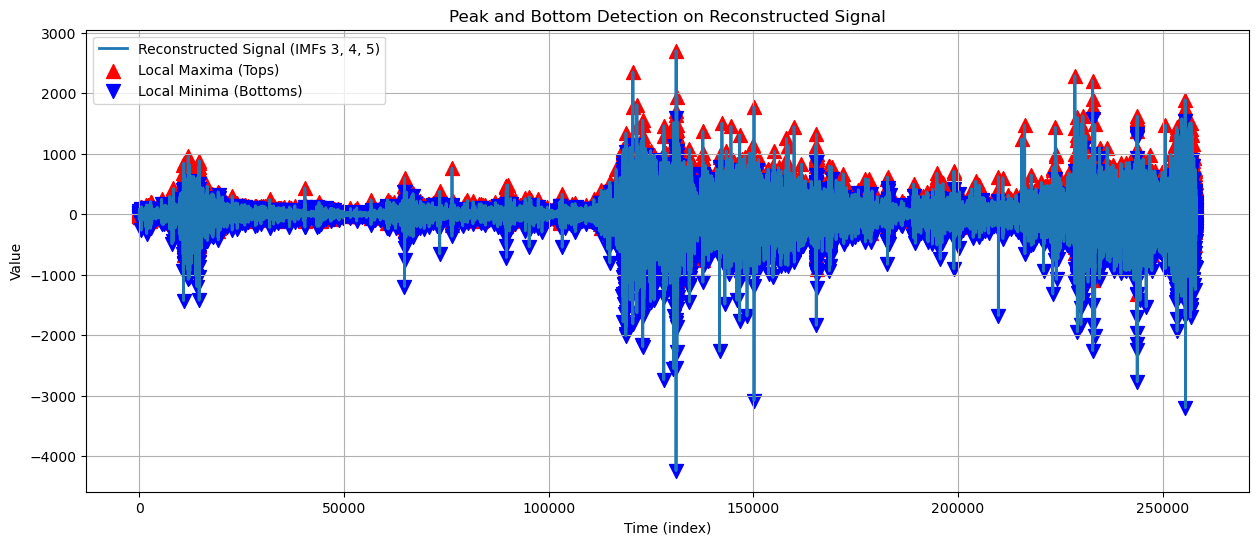

Detection completed. Results saved to 'output_with_peaks_and_bottoms.csv'.


In [15]:
# Step 5: Plot the reconstructed signal with detected extrema
plt.figure(figsize=(15, 6))
plt.plot(reconstructed_signal, label='Reconstructed Signal (IMFs 3, 4, 5)', linewidth=2)
plt.scatter(local_maxima, reconstructed_signal[local_maxima], color='red', label='Local Maxima (Tops)', marker='^', s=100)
plt.scatter(local_minima, reconstructed_signal[local_minima], color='blue', label='Local Minima (Bottoms)', marker='v', s=100)
plt.title('Peak and Bottom Detection on Reconstructed Signal')
plt.xlabel('Time (index)')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

# Step 6: Save the results
data['reconstructed_signal'] = reconstructed_signal
data['is_peak'] = False
data['is_bottom'] = False
data.loc[local_maxima, 'is_peak'] = True
data.loc[local_minima, 'is_bottom'] = True
data.to_csv("output_with_peaks_and_bottoms.csv", index=False)

print("Detection completed. Results saved to 'output_with_peaks_and_bottoms.csv'.")

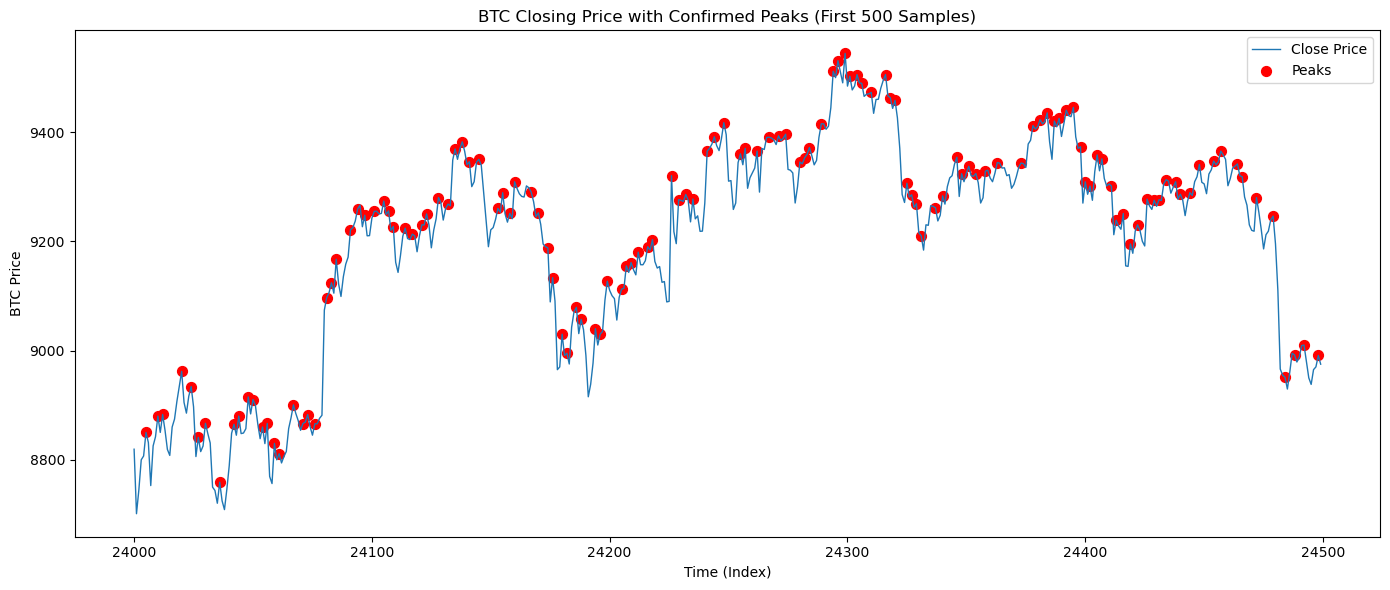

In [16]:
def visualize_peaks_limited_raw(data, sample_size=500):
    """
    Visualize the closing price and detected peaks on a line chart with limited data.
    """
    # Limit the data to the first sample_size entries
    limited_data = data.iloc[24000:24000+sample_size]

    plt.figure(figsize=(14, 6))
    plt.plot(limited_data['close'], label='Close Price', linewidth=1)

    # Plot confirmed peaks
    peak_indices = limited_data[limited_data['is_peak']].index
    plt.scatter(peak_indices, limited_data.loc[peak_indices, 'close'], color='red', label='Peaks', s=50)

    plt.title(f"BTC Closing Price with Confirmed Peaks (First {sample_size} Samples)")
    plt.xlabel("Time (Index)")
    plt.ylabel("BTC Price")
    plt.legend()
    plt.tight_layout()
    plt.show()

visualize_peaks_limited_raw(data, sample_size=500)

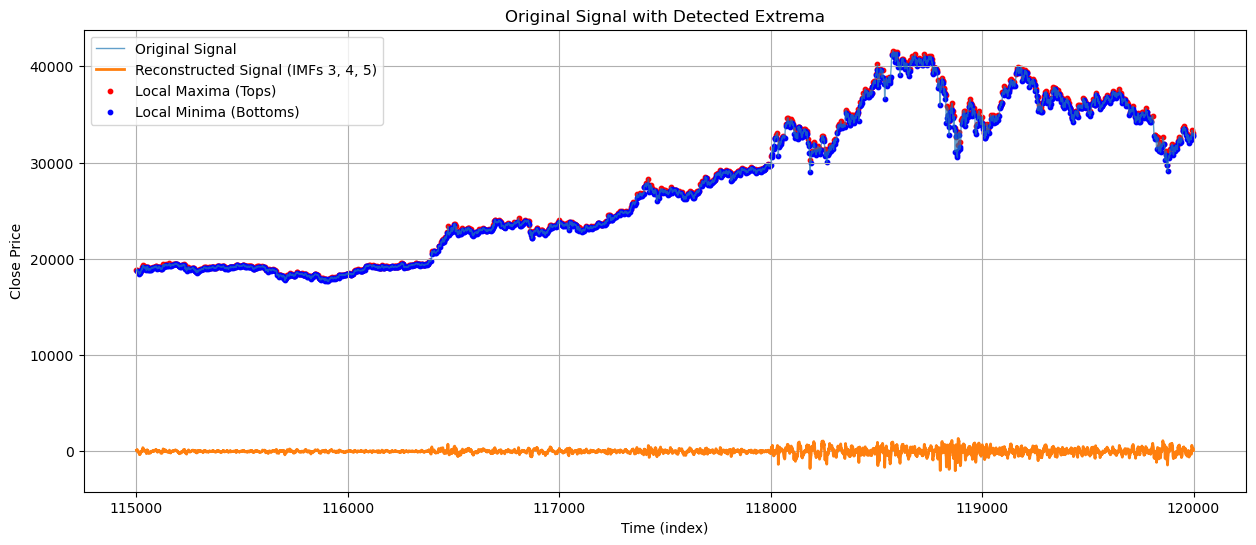

Detection completed. Results saved to 'output_with_extrema_on_original_data.csv'.


In [17]:
# Step 5: Label the original dataset
data['reconstructed_signal'] = reconstructed_signal
data['is_peak'] = False
data['is_bottom'] = False
data.loc[local_maxima, 'is_peak'] = True
data.loc[local_minima, 'is_bottom'] = True

# Focus on a subset of the data for better visualization
shorted_data = data.iloc[115000:120000]

# Step 6: Plot the original signal, reconstructed signal, and labeled extrema
plt.figure(figsize=(15, 6))
plt.plot(shorted_data['close'], label='Original Signal', linewidth=1, alpha=0.7)
plt.plot(shorted_data['reconstructed_signal'], label='Reconstructed Signal (IMFs 3, 4, 5)', linewidth=2)

# Plot is_peak and is_bottom points from the dataset
plt.scatter(
    shorted_data.index[shorted_data['is_peak']],
    shorted_data['close'][shorted_data['is_peak']],
    color='red',
    label='Local Maxima (Tops)',
    marker='o',
    s=10
)
plt.scatter(
    shorted_data.index[shorted_data['is_bottom']],
    shorted_data['close'][shorted_data['is_bottom']],
    color='blue',
    label='Local Minima (Bottoms)',
    marker='o',
    s=10
)

plt.title('Original Signal with Detected Extrema')
plt.xlabel('Time (index)')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

# Step 7: Save the labeled dataset
data.to_csv("output_with_extrema_on_original_data.csv", index=False)

print("Detection completed. Results saved to 'output_with_extrema_on_original_data.csv'.")


BAD

In [18]:
import pandas as pd

# Define a threshold for significant changes (e.g., 1% of the previous value)
threshold = 0.003  # Adjust this value based on your data

# Filter peaks and bottoms based on the threshold
data['peak_value'] = data['close'].where(data['is_peak'], None)
data['bottom_value'] = data['close'].where(data['is_bottom'], None)

# # Remove insignificant peaks
# data['is_peak'] = data['is_peak'] & (
#     (data['peak_value'] / data['close'].shift(1) - 1).abs() > threshold
# )

# # Remove insignificant bottoms
# data['is_bottom'] = data['is_bottom'] & (
#     (data['bottom_value'] / data['close'].shift(1) - 1).abs() > threshold
# )

In [19]:
# Scale reconstructed signal to match the range of the original signal
scaled_reconstructed_signal = (
    (reconstructed_signal - reconstructed_signal.min())
    / (reconstructed_signal.max() - reconstructed_signal.min())
    * (data['close'].max() - data['close'].min())
    + data['close'].min()
)

data['scaled_reconstructed_signal'] = scaled_reconstructed_signal


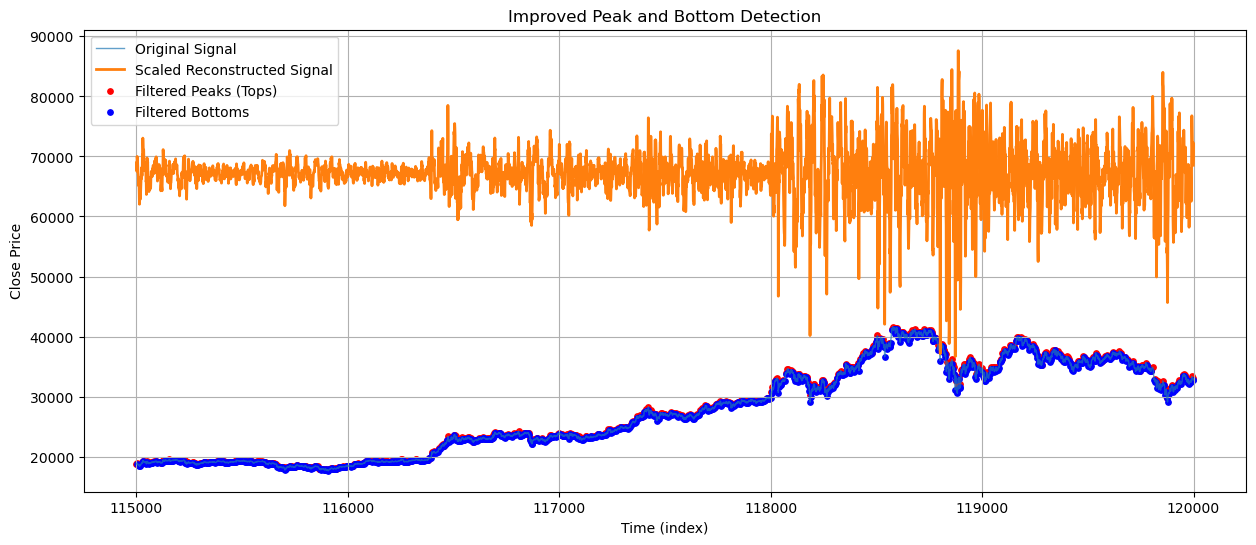

In [20]:
shorted_data = data.iloc[115000:120000]

plt.figure(figsize=(15, 6))
plt.plot(shorted_data['close'], label='Original Signal', linewidth=1, alpha=0.7)
plt.plot(shorted_data['scaled_reconstructed_signal'], label='Scaled Reconstructed Signal', linewidth=2)

# Plot filtered peaks and bottoms
plt.scatter(
    shorted_data.index[shorted_data['is_peak']],
    shorted_data['close'][shorted_data['is_peak']],
    color='red',
    label='Filtered Peaks (Tops)',
    marker='o',
    s=15
)
plt.scatter(
    shorted_data.index[shorted_data['is_bottom']],
    shorted_data['close'][shorted_data['is_bottom']],
    color='blue',
    label='Filtered Bottoms',
    marker='o',
    s=15
)

plt.title('Improved Peak and Bottom Detection')
plt.xlabel('Time (index)')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()


In [21]:
def detect_peaks_with_dynamic_window(data, window_size=50, threshold=0.01):
    closes = data['close'].values
    is_peak = data['is_peak'].values.copy()
    
    # Indices where peaks are identified
    peak_indices = np.where(is_peak)[0]
    confirmed_peaks = []

    for idx in peak_indices:
        while True:
            # Define the window centered around the current peak
            window_start = max(0, idx - window_size // 2)
            window_end = min(len(closes), idx + window_size // 2 + 1)
            window = closes[window_start:window_end]

            # Find the maximum value within the window
            max_value_in_window = np.max(window)
            max_idx_in_window = np.where(window == max_value_in_window)[0][0] + window_start

            # Re-center the window around the maximum value
            new_window_start = max(0, max_idx_in_window - window_size // 2)
            new_window_end = min(len(closes), max_idx_in_window + window_size // 2 + 1)
            new_window = closes[new_window_start:new_window_end]

            # If the current peak is already centered, confirm it
            if max_idx_in_window == idx:
                min_value_in_window = np.min(new_window)
                if closes[idx] > min_value_in_window * (1 + threshold):
                    confirmed_peaks.append(idx)
                break
            else:
                # Shift the peak to the highest value and recheck
                idx = max_idx_in_window

    # Update the DataFrame with the refined peaks
    data['confirmed_peak'] = False
    data.loc[confirmed_peaks, 'confirmed_peak'] = True
    return data


In [22]:
# Bottom detection function
def detect_bottoms_with_dynamic_window(data, window_size=50, threshold=0.01):
    closes = data['close'].values
    is_bottom = data['is_bottom'].values.copy()

    # Indices where bottoms are identified
    bottom_indices = np.where(is_bottom)[0]
    confirmed_bottoms = []

    for idx in bottom_indices:
        while True:
            # Define the window centered around the current bottom
            window_start = max(0, idx - window_size // 2)
            window_end = min(len(closes), idx + window_size // 2 + 1)
            window = closes[window_start:window_end]

            # Find the minimum value within the window
            min_value_in_window = np.min(window)
            min_idx_in_window = np.where(window == min_value_in_window)[0][0] + window_start

            # If the current bottom is already centered, confirm it
            if min_idx_in_window == idx:
                max_value_in_window = np.max(window)
                if closes[idx] < max_value_in_window * (1 - threshold):
                    confirmed_bottoms.append(idx)
                break
            else:
                # Shift the bottom to the lowest value and recheck
                idx = min_idx_in_window

    # Update the DataFrame with the refined bottoms
    data['confirmed_bottom'] = False
    data.loc[confirmed_bottoms, 'confirmed_bottom'] = True
    return data

In [23]:
def visualize_peaks_limited(data, offsize=20000, sample_size=500, window_size=5, threshold=0.01):
    """
    Visualize the closing price and detected peaks on a line chart with limited data.
    """
    # Limit the data to the first sample_size entries
    limited_data = data.iloc[offsize:offsize+sample_size]

    plt.figure(figsize=(14, 6))
    plt.plot(limited_data['close'], label='Close Price', linewidth=1)

    # Plot confirmed peaks
    peak_indices = limited_data[limited_data['confirmed_peak']].index
    bottom_indicies = limited_data[limited_data['confirmed_bottom']].index
    plt.scatter(peak_indices, limited_data.loc[peak_indices, 'close'], color='red', label='Confirmed Peaks', s=20)
    plt.scatter(bottom_indicies, limited_data.loc[bottom_indicies, 'close'], color='blue', label='Confirmed Peaks', s=20)

    plt.title(f"BTC Closing Price with Confirmed Peaks (First {sample_size} Samples)")
    plt.xlabel("Time (Index)")
    plt.ylabel("BTC Price")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"off_{offsize}_windows_{window_size}_threshold{threshold}.png")

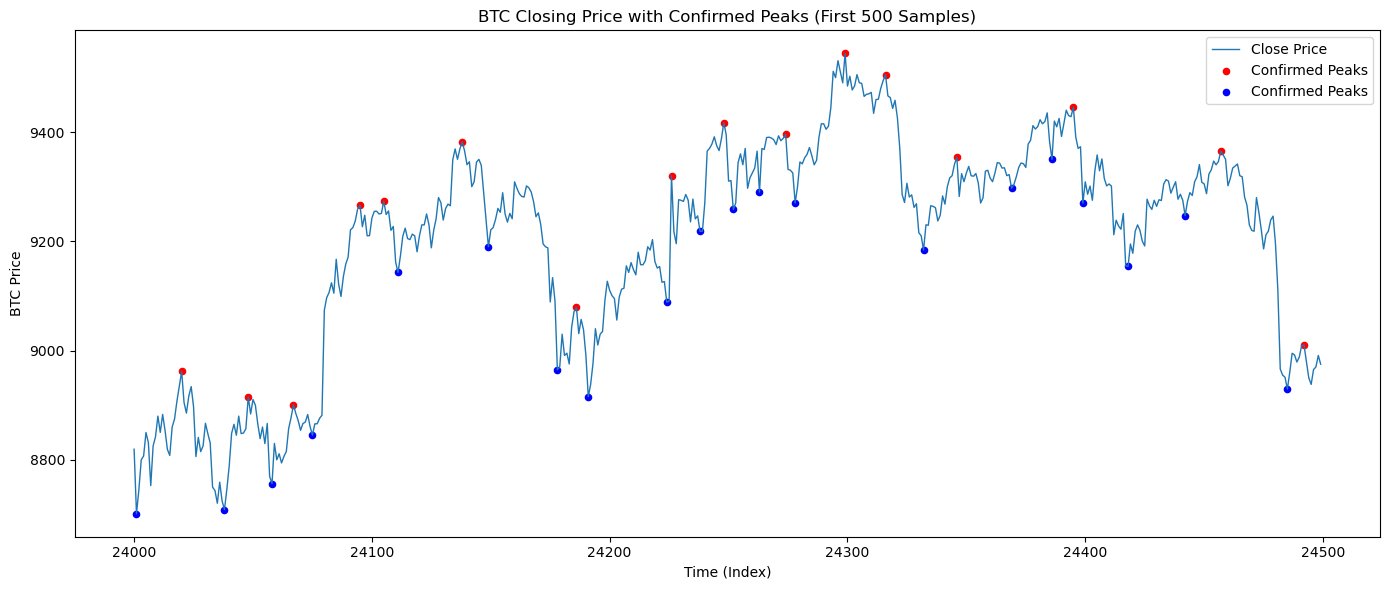

In [24]:
window_size = 16
threshold = 0.008
data = detect_peaks_with_dynamic_window(data, window_size, threshold)
data = detect_bottoms_with_dynamic_window(data, window_size, threshold)
# Call the modified visualization function with 5000 samples
visualize_peaks_limited(data, 24000, 500, window_size, threshold)
data.to_csv("labels.csv", index=False)

In [25]:
def detect_peaks_with_exploration(data, window_size=50, threshold=0.01, exploration_chance=0.2):
    closes = data['close'].values
    is_peak = data['is_peak'].values.copy()
    
    # Indices where peaks are identified
    peak_indices = np.where(is_peak)[0]
    confirmed_peaks = []

    for idx in peak_indices:
        while True:
            # Define the window centered around the current peak
            window_start = max(0, idx - window_size // 2)
            window_end = min(len(closes), idx + window_size // 2 + 1)
            window = closes[window_start:window_end]

            # Find the maximum value within the window
            max_value_in_window = np.max(window)
            max_idx_in_window = np.where(window == max_value_in_window)[0][0] + window_start

            # Controlled exploration mechanism with probability
            if np.random.rand() < exploration_chance:
                random_shift = np.random.randint(-window_size // 2, window_size // 2)
                candidate_idx = max(0, min(len(closes) - 1, idx + random_shift))
                if closes[candidate_idx] > closes[idx]:
                    idx = candidate_idx
                    continue  # Recheck after the shift

            # Re-center the window around the maximum value
            new_window_start = max(0, max_idx_in_window - window_size // 2)
            new_window_end = min(len(closes), max_idx_in_window + window_size // 2 + 1)
            new_window = closes[new_window_start:new_window_end]

            # If the current peak is already centered, confirm it
            if max_idx_in_window == idx:
                min_value_in_window = np.min(new_window)
                if closes[idx] > min_value_in_window * (1 + threshold):
                    confirmed_peaks.append(idx)
                break
            else:
                # Shift the peak to the highest value and recheck
                idx = max_idx_in_window

    # Update the DataFrame with the refined peaks
    data['confirmed_peak'] = False
    data.loc[confirmed_peaks, 'confirmed_peak'] = True
    return data

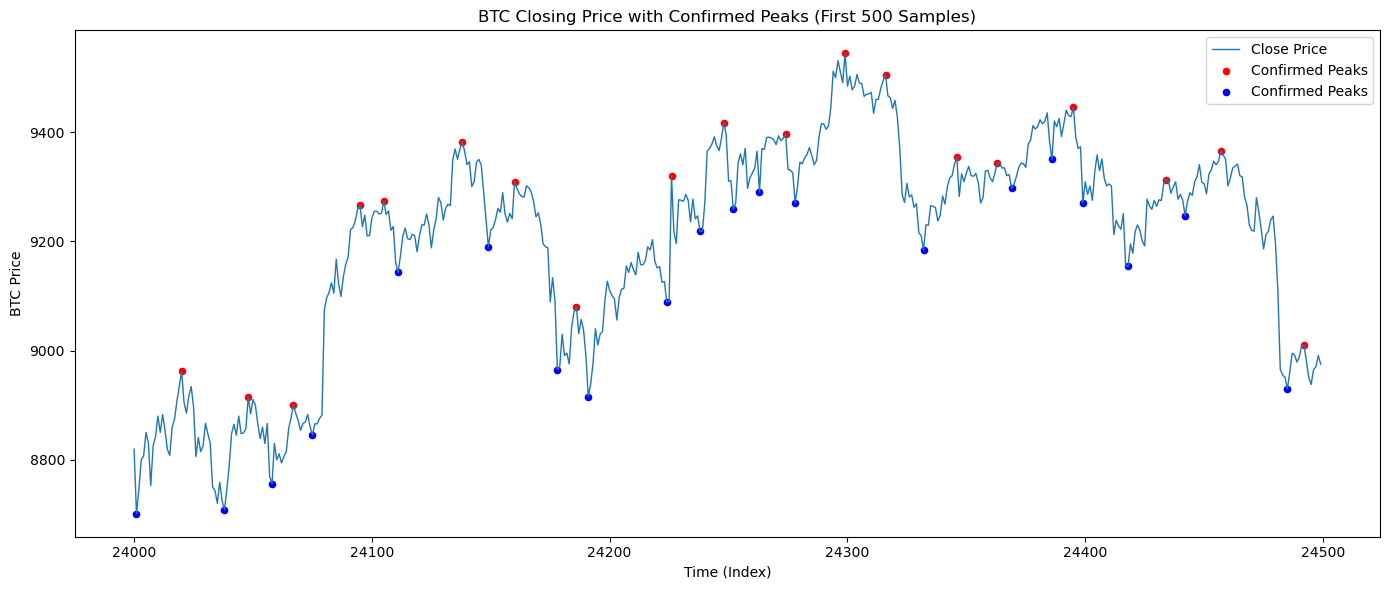

In [26]:
window_size = 16
threshold = 0.006
new_data = detect_peaks_with_exploration(data, window_size, threshold)
# Call the modified visualization function with 5000 samples
visualize_peaks_limited(new_data, 24000, 500, window_size, threshold)

In [27]:
def detect_peaks_with_temperature(data, window_size=50, threshold=0.01, temperature=0.5):
    closes = data['close'].values
    is_peak = data['is_peak'].values.copy()
    confirmed_peaks = []

    peak_indices = np.where(is_peak)[0]

    for idx in peak_indices:
        while True:
            # Define the window centered around the current peak
            window_start = max(0, idx - window_size // 2)
            window_end = min(len(closes), idx + window_size // 2 + 1)
            window = closes[window_start:window_end]

            # Prevent zero division and handle NaN issues
            if temperature <= 0:
                temperature = 0.01  # Prevent invalid values

            # Ensure the window is not empty
            if len(window) == 0:
                break

            # Ensure the highest peak is fully explored
            max_value_in_window = np.max(window)
            max_idx_in_window = np.where(window == max_value_in_window)[0][0] + window_start

            # Apply temperature scaling with controlled randomness
            scores = np.exp(np.clip(window / temperature, -700, 700))
            probabilities = scores / np.sum(scores)

            # Handle numerical issues with probabilities
            if np.isnan(probabilities).any() or np.sum(probabilities) == 0:
                probabilities = np.ones(len(window)) / len(window)

            # Choose candidate index based on the temperature-controlled probabilities
            chosen_idx_offset = np.random.choice(len(window), p=probabilities)
            candidate_idx = window_start + chosen_idx_offset

            # If the current peak isn't the maximum, move to the highest detected peak
            if candidate_idx != max_idx_in_window:
                idx = max_idx_in_window
            else:
                min_value_in_window = np.min(window)
                if closes[idx] > min_value_in_window * (1 + threshold):
                    confirmed_peaks.append(idx)
                break  # Stop only if the true top is reached

    # Update the DataFrame with the refined peaks
    data['confirmed_peak'] = False
    data.loc[confirmed_peaks, 'confirmed_peak'] = True
    return data

window_size = 16
threshold = 0.006
temperature_data = detect_peaks_with_temperature(data, window_size, threshold, 0.9)
# Call the modified visualization function with 5000 samples
visualize_peaks_limited(temperature_data, 24000, 500, window_size, threshold)

KeyboardInterrupt: 

In [196]:
def detect_peaks_with_reinforcement_learning(data, window_size=50, threshold=0.01, temperature=0.5, gamma=0.9):
    closes = data['close'].values
    is_peak = data['is_peak'].values.copy()
    confirmed_peaks = []
    rewards = []  # To track cumulative reward

    peak_indices = np.where(is_peak)[0]

    for idx in peak_indices:
        iteration = 0
        max_iterations = 1000
        cumulative_reward = 0
        visited_indices = set()

        while iteration < max_iterations:
            iteration += 1

            # Define the window and avoid errors
            window_start = max(0, idx - window_size // 2)
            window_end = min(len(closes), idx + window_size // 2 + 1)
            window = closes[window_start:window_end]

            if temperature <= 0:
                temperature = 0.01

            # Compute softmax probabilities for exploration
            shifted_window = window - np.max(window)
            scores = np.exp(np.clip(shifted_window / temperature, -700, 700))
            probabilities = scores / np.sum(scores)

            # Exploration vs Exploitation Decision (ε-greedy style)
            if np.random.rand() < temperature:
                # Explore: Random move based on probabilities
                chosen_idx_offset = np.random.choice(len(window), p=probabilities)
                candidate_idx = window_start + chosen_idx_offset
            else:
                # Exploit: Move to the highest point deterministically
                candidate_idx = np.argmax(window) + window_start

            # Prevent revisiting the same point
            if idx in visited_indices:
                cumulative_reward -= 1  # Penalty for looping
                break
            visited_indices.add(idx)

            # Confirm the peak if conditions are met
            min_value_in_window = np.min(window)

            if closes[idx] > min_value_in_window * (1 + threshold):
                confirmed_peaks.append(idx)
                cumulative_reward += 1  # Positive reward for peak confirmation
                break
            else:
                cumulative_reward -= 0.5  # Negative reward for false peak
                idx = candidate_idx  # Move to the new candidate peak

            # **Discounted Reward** (Gamma factor for long-term reward)
            cumulative_reward *= gamma

        # Record cumulative reward
        rewards.append(cumulative_reward)

    # Update the DataFrame with the refined peaks
    data['confirmed_peak'] = False
    data.loc[confirmed_peaks, 'confirmed_peak'] = True
    # Ensure full length alignment
    data['reward'] = 0  # Initialize with default
    for i, idx in enumerate(peak_indices):
        if i < len(rewards):
            data.at[idx, 'reward'] = rewards[i]
    return data

In [197]:
def detect_bottoms_with_reinforcement_learning(data, window_size=50, threshold=0.01, temperature=0.5, gamma=0.9):
    closes = data['close'].values
    is_bottom = data['is_bottom'].values.copy()
    confirmed_bottoms = []
    rewards = []  # To track cumulative reward

    bottom_indices = np.where(is_bottom)[0]

    for idx in bottom_indices:
        iteration = 0
        max_iterations = 1000
        cumulative_reward = 0
        visited_indices = set()

        while iteration < max_iterations:
            
            iteration += 1

            # Define the window and avoid errors
            window_start = max(0, idx - window_size // 2)
            window_end = min(len(closes), idx + window_size // 2 + 1)
            window = closes[window_start:window_end]

            if temperature <= 0:
                temperature = 0.01

            # Compute softmax probabilities for exploration
            shifted_window = window - np.min(window)
            scores = np.exp(np.clip(-shifted_window / temperature, -700, 700))
            probabilities = scores / np.sum(scores)

            # Exploration vs Exploitation Decision (ε-greedy style)
            if np.random.rand() < temperature:
                # Explore: Random move based on probabilities
                chosen_idx_offset = np.random.choice(len(window), p=probabilities)
                candidate_idx = window_start + chosen_idx_offset
            else:
                # Exploit: Move to the lowest point deterministically
                candidate_idx = np.argmin(window) + window_start

            # Prevent revisiting the same point
            if idx in visited_indices:
                cumulative_reward -= 1  # Penalty for looping
                break
            visited_indices.add(idx)

            # Confirm the bottom if conditions are met
            max_value_in_window = np.max(window)

            if closes[idx] < max_value_in_window * (1 - threshold):
                confirmed_bottoms.append(idx)
                cumulative_reward += 1  # Positive reward for bottom confirmation
                break
            else:
                cumulative_reward -= 0.5  # Negative reward for false bottom
                idx = candidate_idx  # Move to the new candidate bottom

            # **Discounted Reward** (Gamma factor for long-term reward)
            cumulative_reward *= gamma

        # Record cumulative reward
        rewards.append(cumulative_reward)

    # Update the DataFrame with the refined bottoms
    data['confirmed_bottom'] = False
    data.loc[confirmed_bottoms, 'confirmed_bottom'] = True
    # Ensure full length alignment
    data['reward'] = 0  # Initialize with default
    for i, idx in enumerate(bottom_indices):
        if i < len(rewards):
            data.at[idx, 'reward'] = rewards[i]
    return data


In [206]:
window_size = 16
threshold = 0.005
temperature = 0.5
R_data = detect_peaks_with_reinforcement_learning(data, window_size, threshold, temperature)
R_data = detect_bottoms_with_reinforcement_learning(R_data, window_size, threshold, temperature)

/tmp/ipykernel_4553/1583471696.py:70: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.55' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.at[idx, 'reward'] = rewards[i]
/tmp/ipykernel_4553/4042516905.py:70: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.55' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.at[idx, 'reward'] = rewards[i]


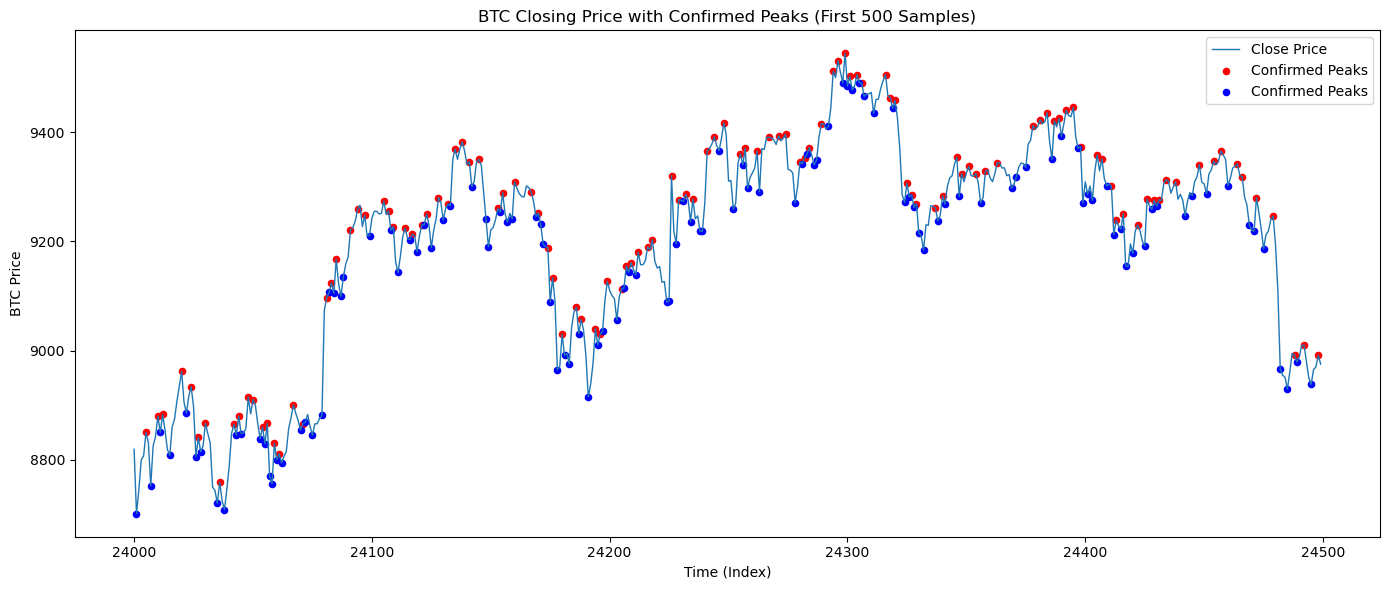

In [207]:
visualize_peaks_limited(R_data, 24000, 500, window_size, threshold)

In [280]:
def detect_peaks_with_reinforcement_learning_v2(data, window_size=50, threshold=0.01, second_threshold=0.005, temperature=0.5, gamma=0.9):
    closes = data['close'].values
    is_peak = data['is_peak'].values.copy()
    confirmed_peaks = []
    rewards = []  # To track cumulative reward

    peak_indices = np.where(is_peak)[0]

    for idx in peak_indices:
        iteration = 0
        max_iterations = 1000
        cumulative_reward = 0
        temperature = max(0.01, temperature * (1 + cumulative_reward / (iteration + 1)))
        visited_indices = set()

        while iteration < max_iterations:
            iteration += 1

            # Define the window and avoid errors
            window_start = max(0, idx - window_size // 2)
            window_end = min(len(closes), idx + window_size // 2 + 1)
            window = closes[window_start:window_end]

            if temperature <= 0:
                temperature = 0.01

            # Compute softmax probabilities for exploration
            shifted_window = window - np.max(window)
            scores = np.exp(np.clip(shifted_window / temperature, -700, 700))
            probabilities = scores / np.sum(scores)

            # Exploration vs Exploitation Decision (ε-greedy style)
            if np.random.rand() < temperature:
                # Explore: Random move based on probabilities
                chosen_idx_offset = np.random.choice(len(window), p=probabilities)
                candidate_idx = window_start + chosen_idx_offset
            else:
                # Exploit: Move to the highest point deterministically
                candidate_idx = np.argmax(window) + window_start

            # Prevent revisiting the same point
            if idx in visited_indices:
                cumulative_reward -= 1  # Penalty for looping
                break
            visited_indices.add(idx)

            # Confirm the peak if conditions are met
            min_value_in_window = np.min(window)
            sorted_window = np.sort(window)
            second_max_value_in_window = sorted_window[-2] if len(sorted_window) > 1 else sorted_window[-1]

            if closes[idx] > min_value_in_window * (1 + threshold) :
                if closes[idx] < second_max_value_in_window * (1 + second_threshold):
                    print(f"Peak confirmed at index {idx} with value {closes[idx]}, min: {min_value_in_window}, second_max: {second_max_value_in_window}")
                    raise ValueError("Peak confirmation error: Peak value is not the highest in the window")
                print(f"Peak confirmed at index {idx} with value {closes[idx]}, min: {min_value_in_window}, second_max: {second_max_value_in_window}")
                confirmed_peaks.append(idx)
                cumulative_reward += 1  # Positive reward for peak confirmation
                break
            else:
                cumulative_reward -= 0.5  # Negative reward for false peak
                idx = candidate_idx  # Move to the new candidate peak

            # **Discounted Reward** (Gamma factor for long-term reward)
            cumulative_reward *= gamma

        # Record cumulative reward
        rewards.append(cumulative_reward)

    # Update the DataFrame with the refined peaks
    data['confirmed_peak'] = False
    data.loc[confirmed_peaks, 'confirmed_peak'] = True
    # Ensure full length alignment
    data['reward'] = 0  # Initialize with default
    for i, idx in enumerate(peak_indices):
        if i < len(rewards):
            data.at[idx, 'reward'] = rewards[i]
    return data

In [281]:
def detect_bottoms_with_reinforcement_learning_v2(data, window_size=50, threshold=0.01, second_threshold=0.005, temperature=0.5, gamma=0.9):
    closes = data['close'].values
    is_bottom = data['is_bottom'].values.copy()
    confirmed_bottoms = []
    rewards = []  # To track cumulative reward

    bottom_indices = np.where(is_bottom)[0]

    for idx in bottom_indices:
        iteration = 0
        max_iterations = 1000
        cumulative_reward = 0
        temperature = max(0.01, temperature * (1 + cumulative_reward / (iteration + 1)))
        visited_indices = set()

        while iteration < max_iterations:
            iteration += 1

            # Define the window and avoid errors
            window_start = max(0, idx - window_size // 2)
            window_end = min(len(closes), idx + window_size // 2 + 1)
            window = closes[window_start:window_end]

            if temperature <= 0:
                temperature = 0.01

            # Compute softmax probabilities for exploration
            shifted_window = window - np.min(window)
            scores = np.exp(np.clip(-shifted_window / temperature, -700, 700))
            probabilities = scores / np.sum(scores)

            # Exploration vs Exploitation Decision (ε-greedy style)
            if np.random.rand() < temperature:
                # Explore: Random move based on probabilities
                chosen_idx_offset = np.random.choice(len(window), p=probabilities)
                candidate_idx = window_start + chosen_idx_offset
            else:
                # Exploit: Move to the lowest point deterministically
                candidate_idx = np.argmin(window) + window_start

            # Prevent revisiting the same point
            if idx in visited_indices:
                cumulative_reward -= 1  # Penalty for looping
                break
            visited_indices.add(idx)

            # Confirm the bottom if conditions are met
            max_value_in_window = np.max(window)
            sorted_window = np.sort(window)
            second_min_value_in_window = sorted_window[1] if len(sorted_window) > 1 else sorted_window[0]

            if closes[idx] < max_value_in_window * (1 - threshold) and closes[idx] < second_min_value_in_window*(1 - second_threshold):
                if closes[idx] > second_min_value_in_window * (1 - second_threshold):
                    raise ValueError("Bottom confirmation error: Bottom value is not the lowest in the window")
                confirmed_bottoms.append(idx)
                cumulative_reward += 1  # Positive reward for bottom confirmation
                break
            else:
                cumulative_reward -= 0.5  # Negative reward for false bottom
                idx = candidate_idx  # Move to the new candidate bottom

            # **Discounted Reward** (Gamma factor for long-term reward)
            cumulative_reward *= gamma

        # Record cumulative reward
        rewards.append(cumulative_reward)

    # Update the DataFrame with the refined bottoms
    data['confirmed_bottom'] = False
    data.loc[confirmed_bottoms, 'confirmed_bottom'] = True
    # Ensure full length alignment
    data['reward'] = 0  # Initialize with default
    for i, idx in enumerate(bottom_indices):
        if i < len(rewards):
            data.at[idx, 'reward'] = rewards[i]
    return data


In [282]:
window_size = 8
threshold = 0.004
threshold_2 = 0.000
temperature = 0.5
R2_data = detect_peaks_with_reinforcement_learning_v2(data, window_size, threshold, threshold_2, temperature)
R2_data = detect_bottoms_with_reinforcement_learning_v2(data, window_size, threshold, threshold_2, temperature)

Peak confirmed at index 2 with value 4310.07, min: 4261.45, second_max: 4310.07
Peak confirmed at index 5 with value 4320.0, min: 4261.45, second_max: 4320.0
Peak confirmed at index 8 with value 4330.0, min: 4291.37, second_max: 4330.0
Peak confirmed at index 10 with value 4345.45, min: 4291.37, second_max: 4330.0
Peak confirmed at index 16 with value 4360.71, min: 4291.38, second_max: 4360.7
Peak confirmed at index 23 with value 4444.0, min: 4360.0, second_max: 4444.0
Peak confirmed at index 25 with value 4440.0, min: 4360.0, second_max: 4474.8


ValueError: Peak confirmation error: Peak value is not the highest in the window

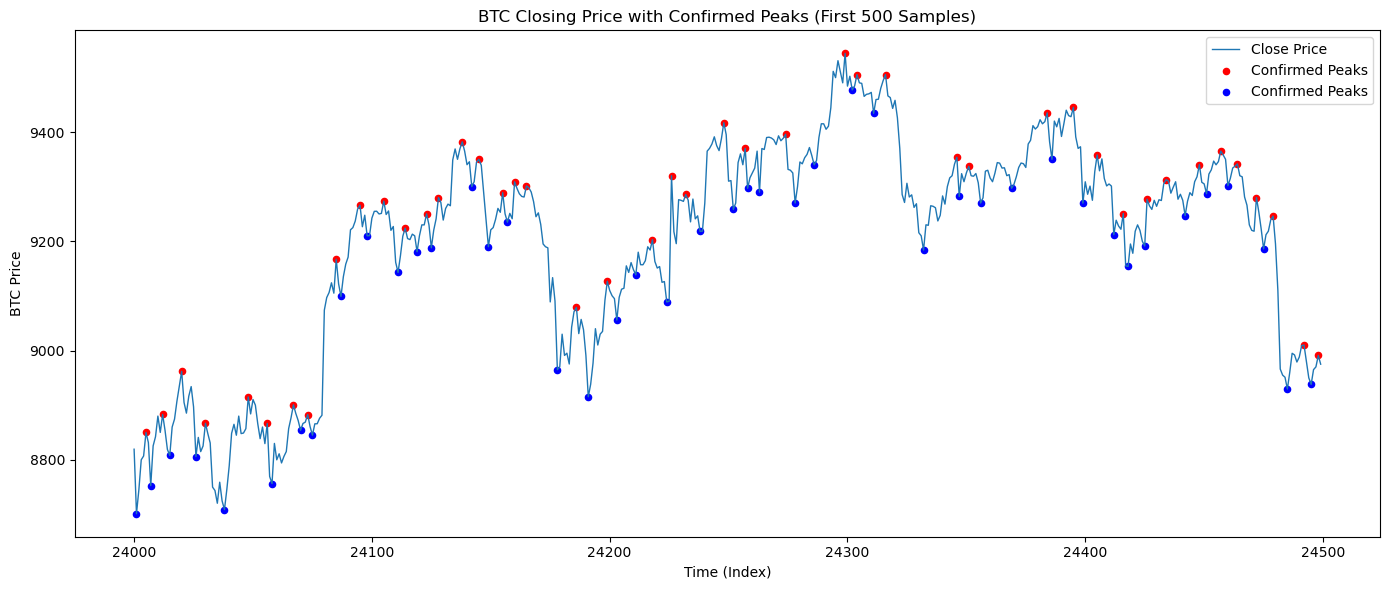

In [279]:
visualize_peaks_limited(R2_data, 24000, 500, window_size, threshold)

In [284]:
def detect_peaks_stack(data, window_size=50, threshold=0.01, second_threshold=0.005, temperature=0.5, gamma=0.9, max_iterations=1000):
    closes = data['close'].values
    is_peak = data['is_peak'].values.copy()
    confirmed_peaks = []
    rewards = []  # To track cumulative reward

    # Use a stack for peak refinement
    peak_stack = list(np.where(is_peak)[0])

    while peak_stack:
        idx = peak_stack.pop()
        iteration = 0
        cumulative_reward = 0
        visited_indices = set()

        while iteration < max_iterations:
            iteration += 1

            # Define the window and avoid errors
            window_start = max(0, idx - window_size // 2)
            window_end = min(len(closes), idx + window_size // 2 + 1)
            window = closes[window_start:window_end]

            if temperature <= 0:
                temperature = 0.01

            # Compute softmax probabilities for exploration
            shifted_window = window - np.max(window)
            scores = np.exp(np.clip(shifted_window / temperature, -700, 700))
            probabilities = scores / np.sum(scores)

            # Exploration vs Exploitation Decision (ε-greedy style)
            if np.random.rand() < temperature:
                # Explore: Random move based on probabilities
                chosen_idx_offset = np.random.choice(len(window), p=probabilities)
                candidate_idx = window_start + chosen_idx_offset
            else:
                # Exploit: Move to the highest point deterministically
                candidate_idx = np.argmax(window) + window_start

            # Prevent revisiting the same point
            if idx in visited_indices:
                cumulative_reward -= 1  # Penalty for looping
                break
            visited_indices.add(idx)

            # Confirm the peak if conditions are met
            min_value_in_window = np.min(window)
            sorted_window = np.sort(window)
            second_max_value_in_window = sorted_window[-2] if len(sorted_window) > 1 else sorted_window[-1]

            if closes[idx] > min_value_in_window * (1 + threshold) and closes[idx] > second_max_value_in_window * (1 + second_threshold):
                confirmed_peaks.append(idx)
                cumulative_reward += 1  # Positive reward for peak confirmation
                break
            else:
                cumulative_reward -= 0.5  # Negative reward for false peak
                peak_stack.append(candidate_idx)  # Re-add to stack for further refinement
                break

            # **Discounted Reward** (Gamma factor for long-term reward)
            cumulative_reward *= gamma

        # Record cumulative reward
        rewards.append(cumulative_reward)

    # Update the DataFrame with the refined peaks
    data['confirmed_peak'] = False
    data.loc[confirmed_peaks, 'confirmed_peak'] = True
    # Ensure full length alignment
    data['reward'] = 0  # Initialize with default
    for i, idx in enumerate(confirmed_peaks):
        if i < len(rewards):
            data.at[idx, 'reward'] = rewards[i]
    return data

In [ ]:
window_size = 8
threshold = 0.004
threshold_2 = 0.000
temperature = 0.5
stack_data = detect_peaks_stack(data, window_size, threshold, threshold_2, temperature)
# stack_data = detect_bottoms_stack(data, window_size, threshold, threshold_2, temperature)

In [ ]:
visualize_peaks_limited(stack, 24000, 500, window_size, threshold)